<a id='intro'></a>
## Introduction

I've selected TMDB The Movies DataBase,
What I'm willing to elaborate is differences between genres across time and what attributes that is to make a better movies or popularity
Is revenues and budgets are always related?
What Features are affecting the movie's popularity

I've tried to alter the data in order to best describe the movies in general, dropping outliers in runtime, seizing the popularity accepted and replacing zeros of budget and revenues by the column mean

I've including the maximum popularity and not considering it as an outlier as we want to elaborate its functions


Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
sns.set()
%matplotlib inline

Reading the file

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='wrangling'></a>
## Data Wrangling

#### Data Cleaning: dropping outliers and unnecessary columns

removing outliers in runtime column

In [4]:
df = df[df.runtime.between(df.runtime.quantile(0.25), df.runtime.quantile(0.90))]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7396 entries, 0 to 10863
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7396 non-null   int64  
 1   imdb_id               7395 non-null   object 
 2   popularity            7396 non-null   float64
 3   budget                7396 non-null   int64  
 4   revenue               7396 non-null   int64  
 5   original_title        7396 non-null   object 
 6   cast                  7374 non-null   object 
 7   homepage              1970 non-null   object 
 8   director              7388 non-null   object 
 9   tagline               5733 non-null   object 
 10  keywords              6529 non-null   object 
 11  overview              7395 non-null   object 
 12  runtime               7396 non-null   int64  
 13  genres                7388 non-null   object 
 14  production_companies  6855 non-null   object 
 15  release_date        

looking at df null values

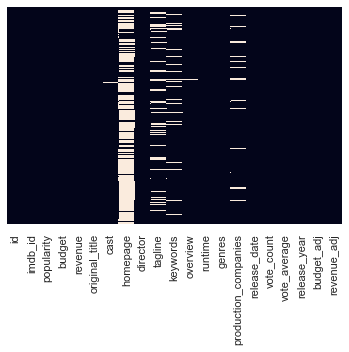

In [6]:
sns.heatmap(df.isnull(), cbar=False)
plt.yticks([]);

Removing unwanted columns

In [7]:
df.drop(columns = ['homepage','id','imdb_id','overview','budget_adj','revenue_adj'], inplace=True)

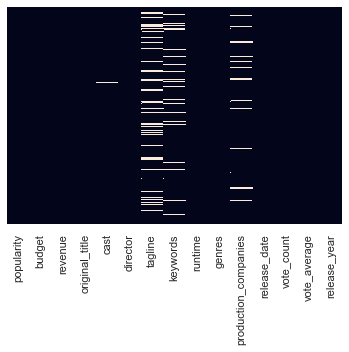

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.yticks([]);

In [9]:
df.head(10)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015
11,6.189369,176000003,183987723,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,Expand your universe.,jupiter|space|woman director|3d|interspecies r...,124,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,2/4/15,1937,5.2,2015
12,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,There is nothing more human than the will to s...,dancing|artificial intelligence|helicopter|dis...,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,1/21/15,2854,7.6,2015
13,5.984995,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,Chris Columbus,Game On.,video game|nerd|alien attack|3d|pixels,105,Action|Comedy|Science Fiction,Columbia Pictures|Happy Madison Productions,7/16/15,1575,5.8,2015
16,5.749758,48000000,325771424,Taken 3,Liam Neeson|Forest Whitaker|Maggie Grace|Famke...,Olivier Megaton,It Ends Here,revenge|murder|on the run|fugitive|framed,109,Crime|Action|Thriller,Twentieth Century Fox Film Corporation|M6 Film...,1/1/15,1578,6.1,2015


In [10]:
df['popularity']

0        32.985763
1        28.419936
2        13.112507
6         8.654359
8         7.404165
           ...    
10856     0.140934
10858     0.317824
10859     0.089072
10861     0.080598
10863     0.065141
Name: popularity, Length: 7396, dtype: float64

looking at the data there are a huge number of movies with popularity less than 1 which doesn't tell us much,
So I decided to drop the values below quanitle 0.25 to make data more informative

In [11]:
df.popularity<df.popularity.quantile(0.25)

0        False
1        False
2        False
6        False
8        False
         ...  
10856     True
10858    False
10859     True
10861     True
10863     True
Name: popularity, Length: 7396, dtype: bool

In [12]:
df[df.popularity<df.popularity.quantile(0.25)].count()

popularity              1849
budget                  1849
revenue                 1849
original_title          1849
cast                    1829
director                1843
tagline                 1100
keywords                1447
runtime                 1849
genres                  1843
production_companies    1508
release_date            1849
vote_count              1849
vote_average            1849
release_year            1849
dtype: int64

In [13]:
df = df[df.popularity.between(df.popularity.quantile(0.25),df.popularity.quantile(1))]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5547 entries, 0 to 10858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            5547 non-null   float64
 1   budget                5547 non-null   int64  
 2   revenue               5547 non-null   int64  
 3   original_title        5547 non-null   object 
 4   cast                  5545 non-null   object 
 5   director              5545 non-null   object 
 6   tagline               4633 non-null   object 
 7   keywords              5082 non-null   object 
 8   runtime               5547 non-null   int64  
 9   genres                5545 non-null   object 
 10  production_companies  5347 non-null   object 
 11  release_date          5547 non-null   object 
 12  vote_count            5547 non-null   int64  
 13  vote_average          5547 non-null   float64
 14  release_year          5547 non-null   int64  
dtypes: float64(2), int64

Replacing all the Zero Values in budget and revenues with the mean of its column

In [15]:
df.replace(0,df.mean(axis=0),inplace=True)

Dropping null values (2 rows) in cast, genres and director columns

In [16]:
null_index = df[ df['cast'].isnull()].index.append(df[ df['genres'].isnull()].index)\
                .append(df[ df['director'].isnull()].index)
df.drop(null_index,inplace=True)

Plotting df columns to check for correlations between them

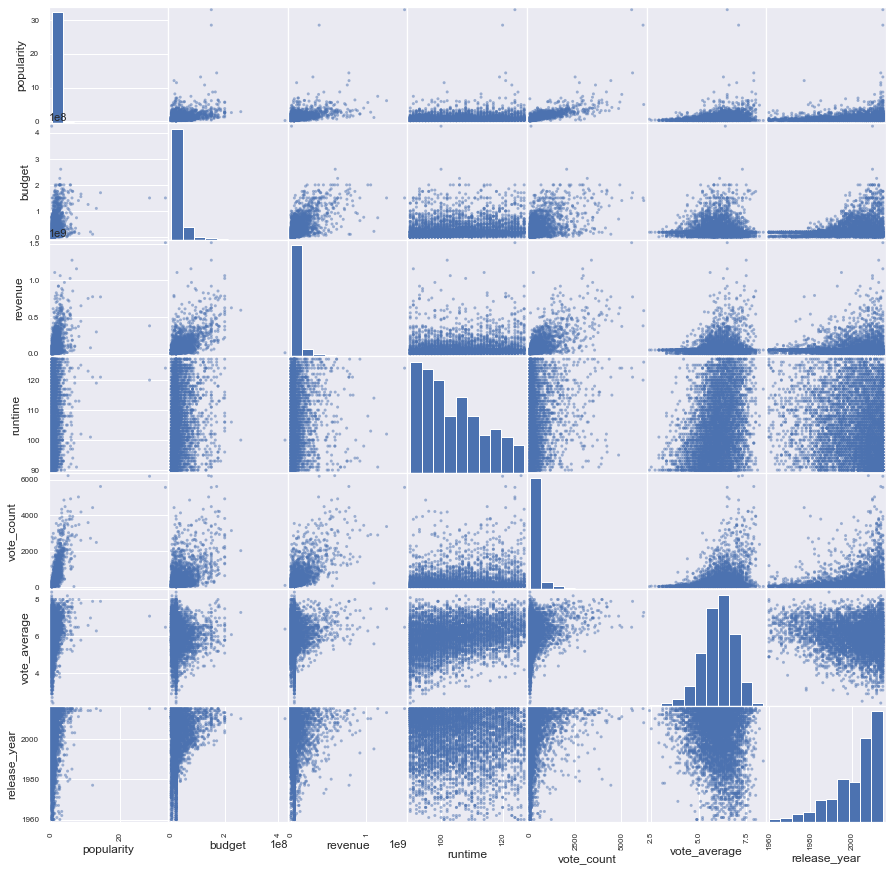

In [17]:
pd.plotting.scatter_matrix(df,figsize=(15,15));

Separating Genres column

In [18]:
df_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')

Sorting data by popularity in descending order to fetch the highest genre in each year

In [19]:
by_year = df.sort_values('popularity',ascending=False)\
    .drop_duplicates(['release_year'], keep = 'first')[['release_year','genres','popularity']]\
    .sort_values('release_year').reset_index(drop=True)

In [20]:
by_year = df.sort_values('popularity',ascending=False)\
    .drop_duplicates(['release_year'], keep = 'first')[['release_year','genres','popularity']]\
    .sort_values('release_year').reset_index(drop=True)

In [21]:
by_year['year_genre'] = list(zip(by_year.release_year,by_year.genres))
by_year

,release_year,genres,popularity,year_genre
0,1960,Drama|Horror|Thriller,2.610362,"(1960, Drama|Horror|Thriller)"
1,1961,Comedy|Drama|Romance,1.752027,"(1961, Comedy|Drama|Romance)"
2,1962,Adventure|Action|Thriller,3.170651,"(1962, Adventure|Action|Thriller)"
3,1963,Action|Thriller|Adventure,2.508235,"(1963, Action|Thriller|Adventure)"
4,1964,Adventure|Action|Thriller,3.153791,"(1964, Adventure|Action|Thriller)"
5,1965,Comedy|Music,0.624024,"(1965, Comedy|Music)"
6,1966,Drama|Science Fiction,0.929393,"(1966, Drama|Science Fiction)"
7,1967,Comedy|Drama|Romance,2.227230,"(1967, Comedy|Drama|Romance)"
8,1968,Adventure|Science Fiction|Mystery,1.152937,"(1968, Adventure|Science Fiction|Mystery)"
9,1969,History|Drama|Western|Crime,1.357317,"(1969, History|Drama|Western|Crime)"


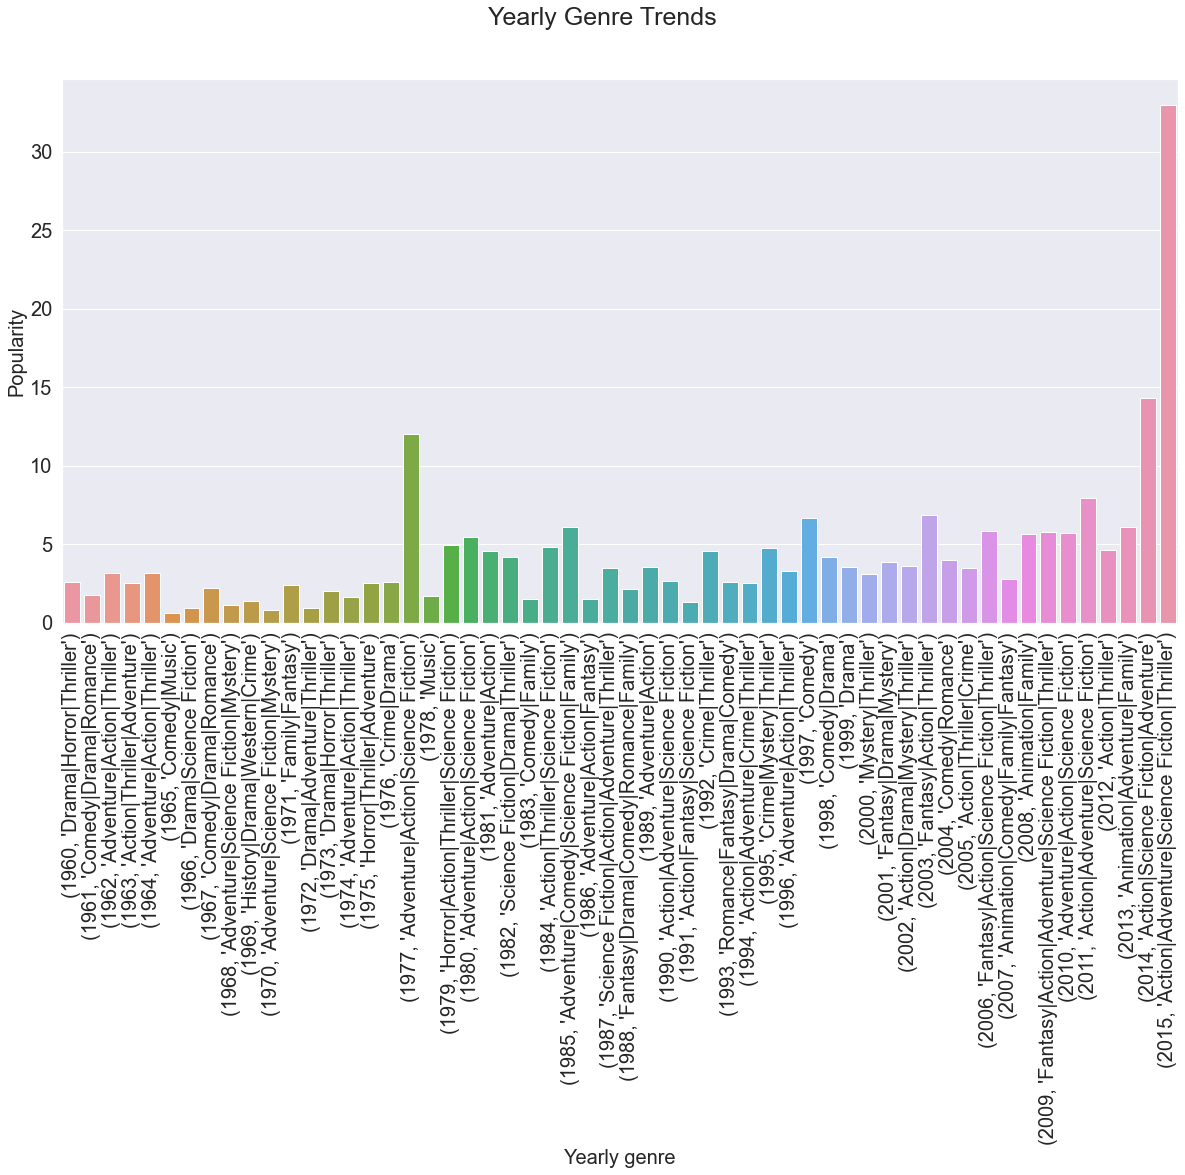

In [41]:
fig = plt.figure(figsize=(20,10));
sns.barplot(data = by_year, x = 'year_genre', y = 'popularity')
fig.suptitle('Yearly Genre Trends', fontsize=25)
plt.xlabel('Yearly genre',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90);
plt.savefig('Genres ranking');

<AxesSubplot:ylabel='popularity'>

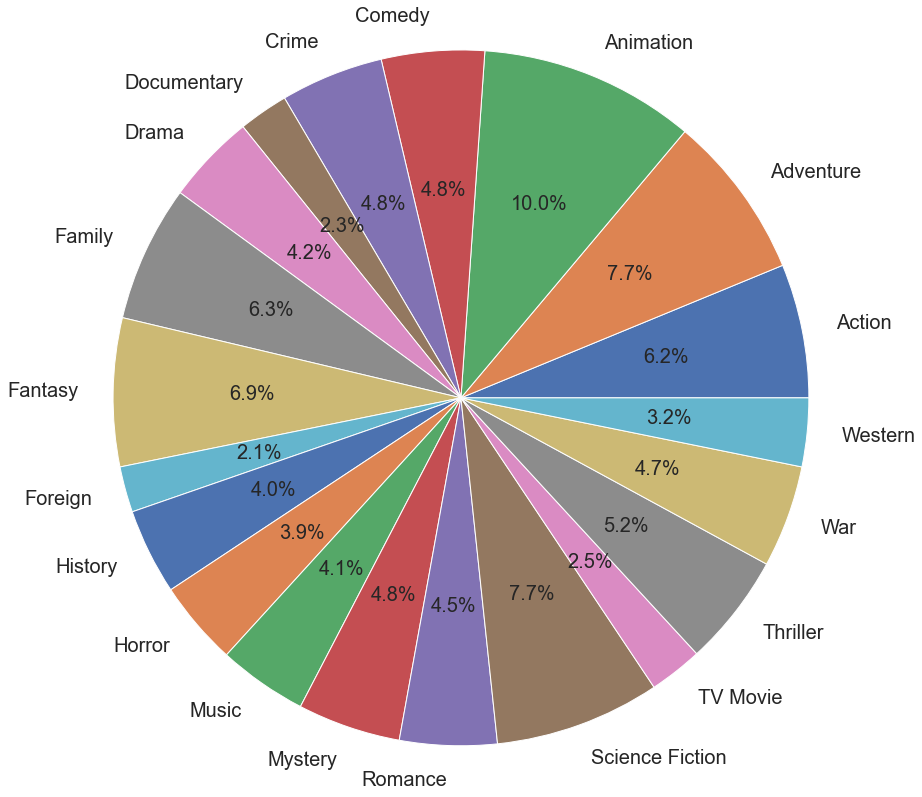

In [23]:
df_genres.groupby('genres')['popularity'].mean().plot(kind='pie',radius=4,autopct='%.1f%%',labeldistance=1.1,fontsize=20)

Plotting Highest 100 rated movies main actor

In [24]:
df_cast = df.assign(cast=df['cast'].str.split('|')).explode('cast')

In [25]:
df_cast.cast

0                Chris Pratt
0        Bryce Dallas Howard
0                Irrfan Khan
0          Vincent D'Onofrio
0              Nick Robinson
                ...         
10858            Carl Reiner
10858        Eva Marie Saint
10858             Alan Arkin
10858            Brian Keith
10858              Paul Ford
Name: cast, Length: 27562, dtype: object

In [26]:
df_cast = df_cast.sort_values('popularity',ascending = False)\
            .drop_duplicates('release_year')[['release_year','cast','popularity']]\
                .sort_values('release_year').reset_index(drop=True)

In [27]:
df_cast['year_actor'] = list(zip(df_cast.release_year,df_cast.cast))

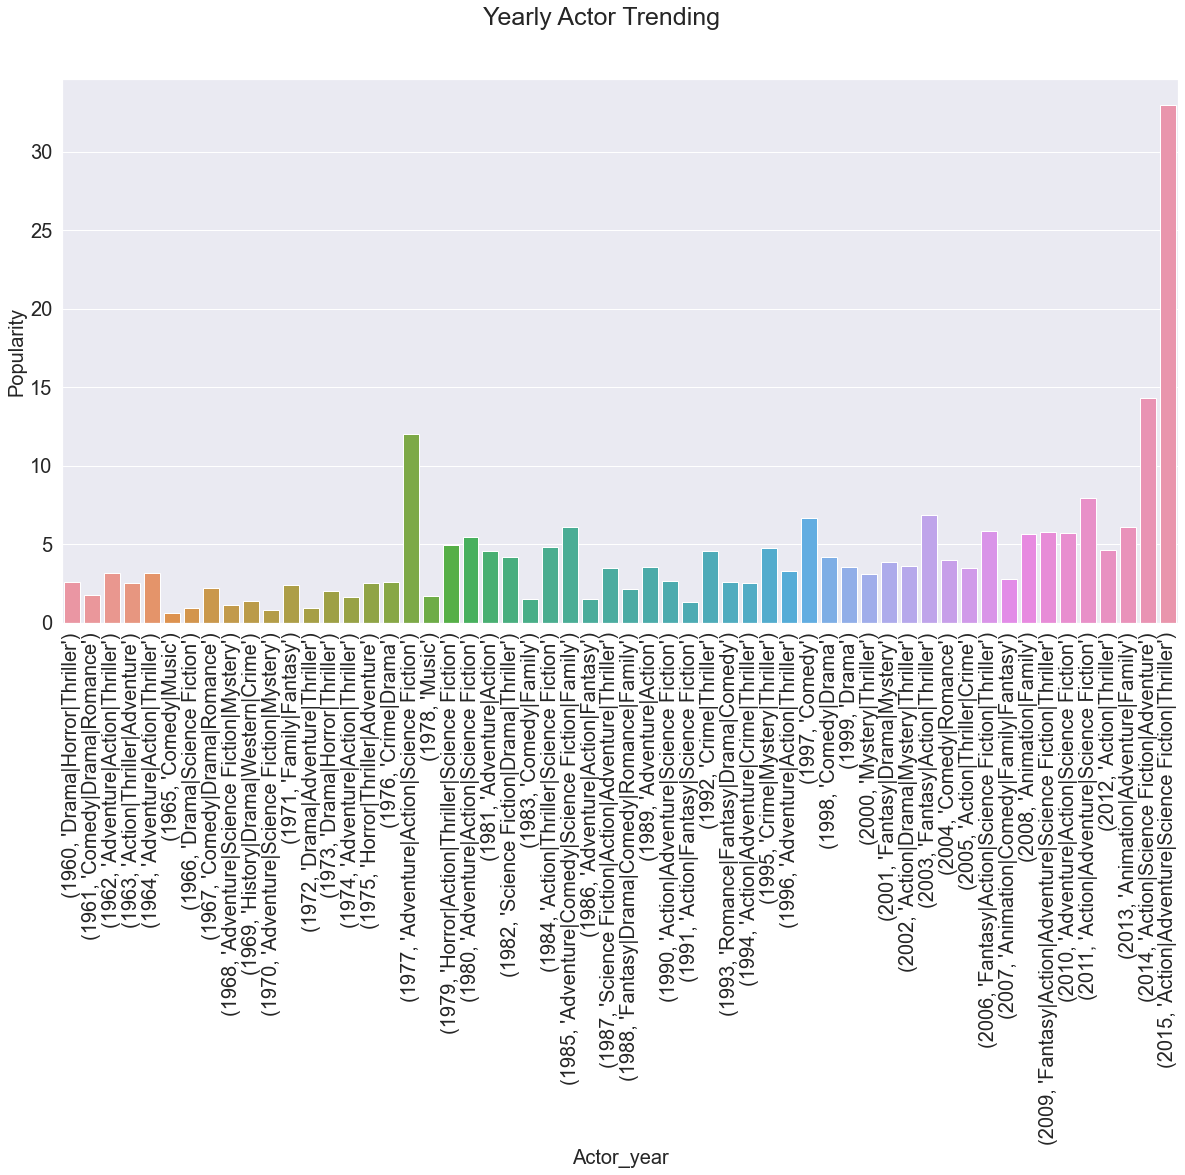

In [28]:
fig = plt.figure(figsize=(20,10));
sns.barplot(data = by_year, x = 'year_genre', y = 'popularity')
fig.suptitle('Yearly Actor Trending', fontsize=25)
plt.xlabel('Actor_year',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90);


### What kinds of proporties are associated with movies that have high revenues?

Creating a new column in df to separate movies with tagline (1) and without (0)

In [29]:
df['tagged'] = np.where(df.tagline.isnull(),0,1)
df[['tagline','tagged']].head()

,tagline,tagged
0,The park is open.,1
1,What a Lovely Day.,1
2,One Choice Can Destroy You,1
6,Reset the future,1
8,"Before Gru, they had a history of bad bosses",1


Revenues difference between Tagged and non tagged movies by mean

Text(0.5, 1.0, 'Tagged and non tagged movies vs Average Revenue ')

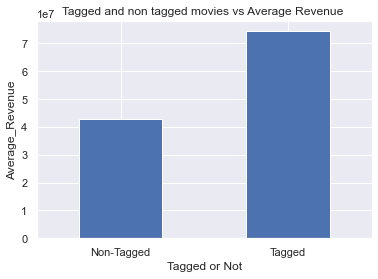

In [30]:
df.groupby('tagged')['revenue'].mean().plot(kind='bar')
plt.xticks([0, 1], ['Non-Tagged', 'Tagged'],rotation=0)
plt.ylabel('Average_Revenue')
plt.xlabel('Tagged or Not')
plt.title('Tagged and non tagged movies vs Average Revenue ')

Popularity difference between Tagged and non tagged movies by mean

Text(0.5, 1.0, 'Tagged and non tagged movies vs Average Revenue ')

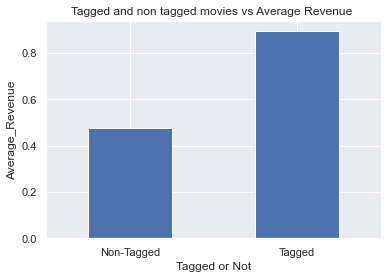

In [31]:
df.groupby('tagged')['popularity'].mean().plot(kind='bar')
plt.xticks([0, 1], ['Non-Tagged', 'Tagged'],rotation=0)
plt.ylabel('Average_Revenue')
plt.xlabel('Tagged or Not')
plt.title('Tagged and non tagged movies vs Average Revenue ')

Correlation between vote average, vote count and revenue

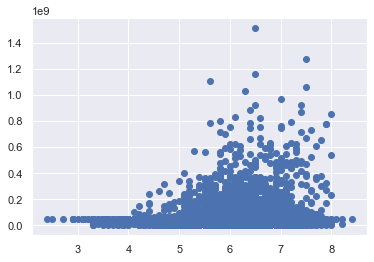

In [32]:
plt.scatter(df.vote_average,df.revenue);

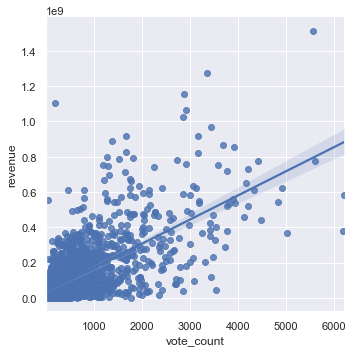

In [33]:
sns.lmplot(x = 'vote_count',y='revenue',data = df);

A positive correlation between budget and revenue

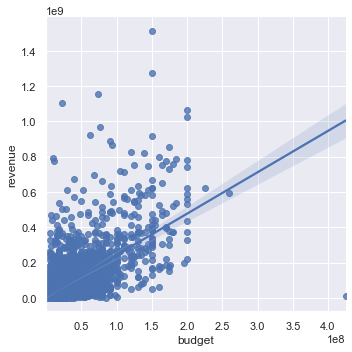

In [34]:
g = sns.lmplot(x='budget', y='revenue', data=df)

C:\Users\Ahmed Hassan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='release_year'>

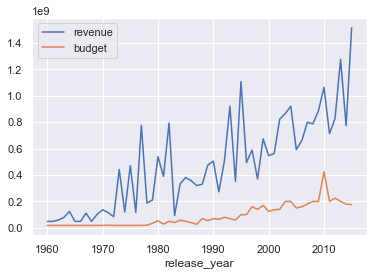

In [35]:
df.groupby('release_year')['revenue','budget'].max().plot(kind='line')

C:\Users\Ahmed Hassan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='release_year'>

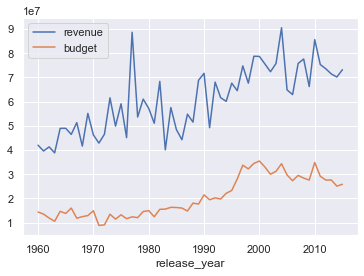

In [36]:
df.groupby('release_year')['revenue','budget'].mean().plot(kind='line')

Movies are getting more popular overtime

<AxesSubplot:xlabel='release_year'>

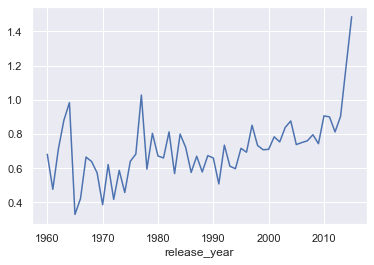

In [37]:
df.groupby('release_year')['popularity'].mean().plot(kind='line')

<a id='conclusions'></a>
## Conclusions
Overall intention and interpretation about your analysis, overall conclusion on the project based on the analysis done

Each year has its own trending genre or mix of genre, for example Action and Adventure have the highest popularity in the last decade

Since the number of outliers in  either popularity, budget or revenue columns are high and it is actually represents most of the data since the normal values where they are not considered as outliers has missing values whether 0 budget or revenue or popularity

A better criteria has to be made in order to include those outliers or remove the unuseful data which misleads the analysis


Higher number of people are getting interested in movies over time

Vote counts are increasing in the last decade since there are more tools and the ease of content access throughout the web gave that luxury 

Revenues and budgets are increasing in the latest years especially revenues since the enhanced marketing techniques and the internet help spreading the word



Limitation

Genres, Actors and Production companies are merged together in one column which don't give enough useful ouput when plotting the maximum in each year requires splitting to categorize the generes and popularity and which genre has the highest mean

Data were'nt sorted by any kind which should be sorted in terms of popularity, budget or revenues

There are great number of budget outliers 5060 difference between modified df with no outliers and df with outliers 
Maybe some critieria is better to be implemented on the movies sorted in the databases to avoid such diversion, where those outliers might be used in better analysis or visualization as shown above as the number of outliers in columns of budget, popularity and revenue are pretty much high 

also the number of outliers are huge whether in popularity, budget or revenue columns which can be used to best describe the data since when removing the outliers visualizations don't tell much about the change of these columns throughout the years


In [461]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDB3.ipynb'])

0